How I made wordclouds for each setion

In [1]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook
from itertools import islice

Importing the workbook

In [2]:
wb = load_workbook('Headings.xlsx')
print(wb.get_sheet_names())

['Sheet1']


In [3]:
sheet = wb.get_sheet_by_name('Sheet1')

In [4]:
data = sheet.values

In [5]:
cols = next(data)[1:]

In [6]:
data = list(data)

In [7]:
index = [r[0] for r in data]

In [8]:
data = (islice(r, 1, None) for r in data)

In [9]:
df = pd.DataFrame(data, index = index, columns = cols)

In [10]:
df.head()

ID_Number          Organization_Name       Date(s)_of_Breach Reported_Date  \
0          1            Mindlance, Inc.              12/28/2017    01/19/2018   
1          2       Rosewood Hotel Group  05/29/2016, 01/11/2017    01/19/2018   
2          3        Corovan Corporation              09/14/2017    01/18/2018   
3          4   Employer Leasing Company  09/14/2017, 09/18/2018    01/18/2018   
4          5  American Golf Corporation  12/12/2017, 12/15/2017    01/18/2018   

                                          Hyperlinks  Total_PDFs PDF Number  \
0  https://oag.ca.gov/ecrime/databreach/reports/s...           1       PDF1   
1  https://oag.ca.gov/ecrime/databreach/reports/s...           1       PDF1   
2  https://oag.ca.gov/ecrime/databreach/reports/s...           1       PDF1   
3  https://oag.ca.gov/ecrime/databreach/reports/s...           1       PDF1   
4  https://oag.ca.gov/ecrime/databreach/reports/s...           1       PDF1   

                                            PDF Link  \
0  https://oag.ca.gov/system/files/California%20T...   
1  https://oag.ca.gov/system/files/Rosewood%20-%2...   
2  https://oag.ca.gov/system/files/Corovan%20-%20...   
3  https://oag.ca.gov/system/files/Employer%20Lea...   
4  https://oag.ca.gov/system/files/Sample%20Notic...   

                                            PDF_Text   Length  \
0  re: notice of data breach dear : mindlance, in...   9181.0   
1  t8321 v.03 01.16.2018return mail processing ce...  26634.0   
2  exhibit 1 by providing this notice, corovan co...  25594.0   
3  by providing this notice, employer leasing com...  25858.0   
4  909 North Sepulveda Blvd Suite 650 El Segundo ...   8583.0   

                                        Introduction  \
0  re: notice of data breach dear : mindlance, in...   
1  t8321 v.03 01.16.2018return mail processing ce...   
2  exhibit 1 by providing this notice, corovan co...   
3  by providing this notice, employer leasing com...   
4                                               None   

                                       What Happened  \
0  ? certain mindlance confidential and proprieta...   
1  ?sabre notified us in late december 2017 that ...   
2  ?  on october 17, 2017, we became aware that c...   
3  ?  on october 17, 2017, we became aware that c...   
4  We were recently informed by the company that ...   

                       What Information Was Involved  \
0  ? an attachment to the december 29, 2017 e-mai...   
1  ?sabre has indicated to us that the affected r...   
2  ?  as part of the investigation into this inci...   
3  ?  as part of the investigation into this inci...   
4  We believe that the incident could have affect...   

                                   What Are We Doing  \
0   first, we want to emphasize that mindlance ha...   
1  after learning of the issue, we quickly began ...   
2  .  we take the security of your personal infor...   
3  .  we take the security of your personal infor...   
4  We take the privacy of personal information se...   

                                     What You Can Do  \
0  \nin addition to the steps mindlance has taken...   
1  we take our obligation to safeguard our guests...   
2  . we encourage you to enroll and receive the c...   
3  . we encourage you to enroll and receive the c...   
4  We recommend that you review credit and debit ...   

                         Other Important Information  \
0  . to help prevent a recurrence of this informa...   
1  we regret that this issue at sabre may affect ...   
2                                               None   
3                                               None   
4                                               None   

                                For More Information     Able to Split?  
0  . mindlance sincerely regrets any inconvenienc...   Yes-All Headings  
1   on fraud alerts, you also may contact the ftc...   Yes-All Headings  
2                                               None  Yes-Some Headin

Importing libraries for the wordcloud

In [11]:
from nltk.tokenize import word_tokenizenize

In [12]:
from nltk.tokenize import RegexpTokenizer

In [13]:
from nltk.corpus import stopwords

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Set stopwords

In [15]:
stop_words = set(stopwords.words('english'))

In [82]:
all_words = df['For More Information'].str.lower().str.cat(sep=' ')

Remove punctuation

Tokenize Words

In [83]:
tokenizer = RegexpTokenizer(r'\w+')
without_punc = tokenizer.tokenize(all_words)

Create a string object

In [84]:
new_word_string = ' '.join(without_punc)

In [85]:
words_tokens = word_tokenize(new_word_string)

Remove stopwords

In [86]:
filtered_words = [word for word in words_tokens if word not in stop_words]

In [87]:
new_word_string = ' '.join(filtered_words)

In [88]:
wc = WordCloud(background_color='white', max_words = 100, stopwords=stop_words)

In [89]:
wc.generate(new_word_string)

Introduction

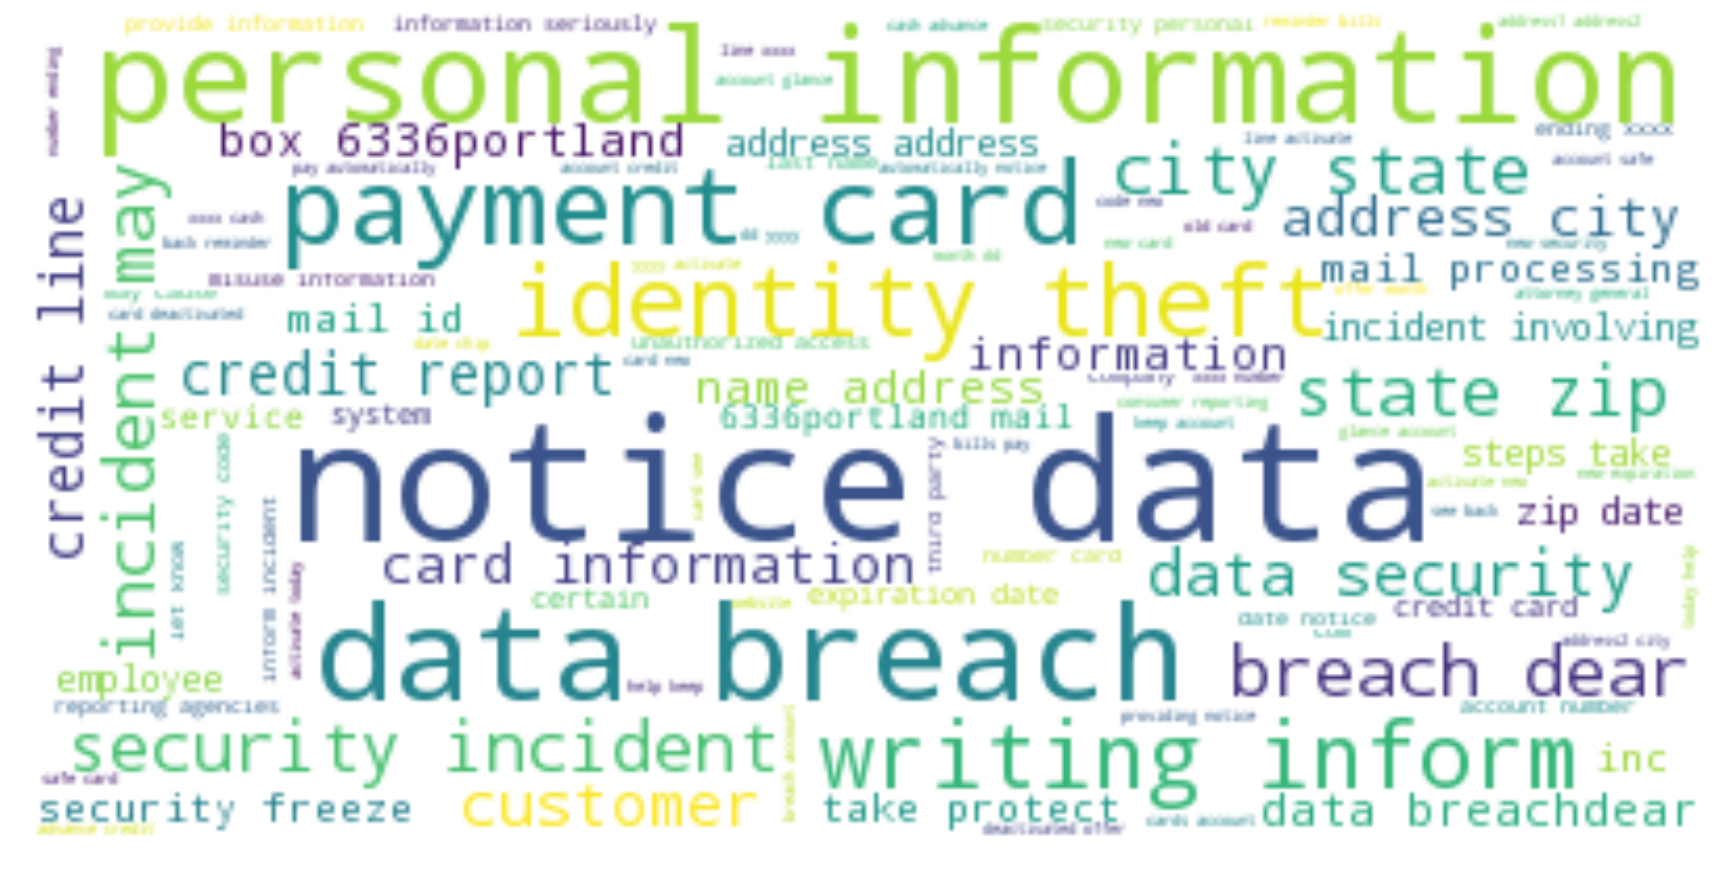

In [34]:
plt.figure(figsize=(30, 30))
plt.imshow(wc, interpolation = 'bilinear', cmap = 'Set1')
plt.axis("off")
plt.savefig('Introduction.png')
plt.show()

What Happened?

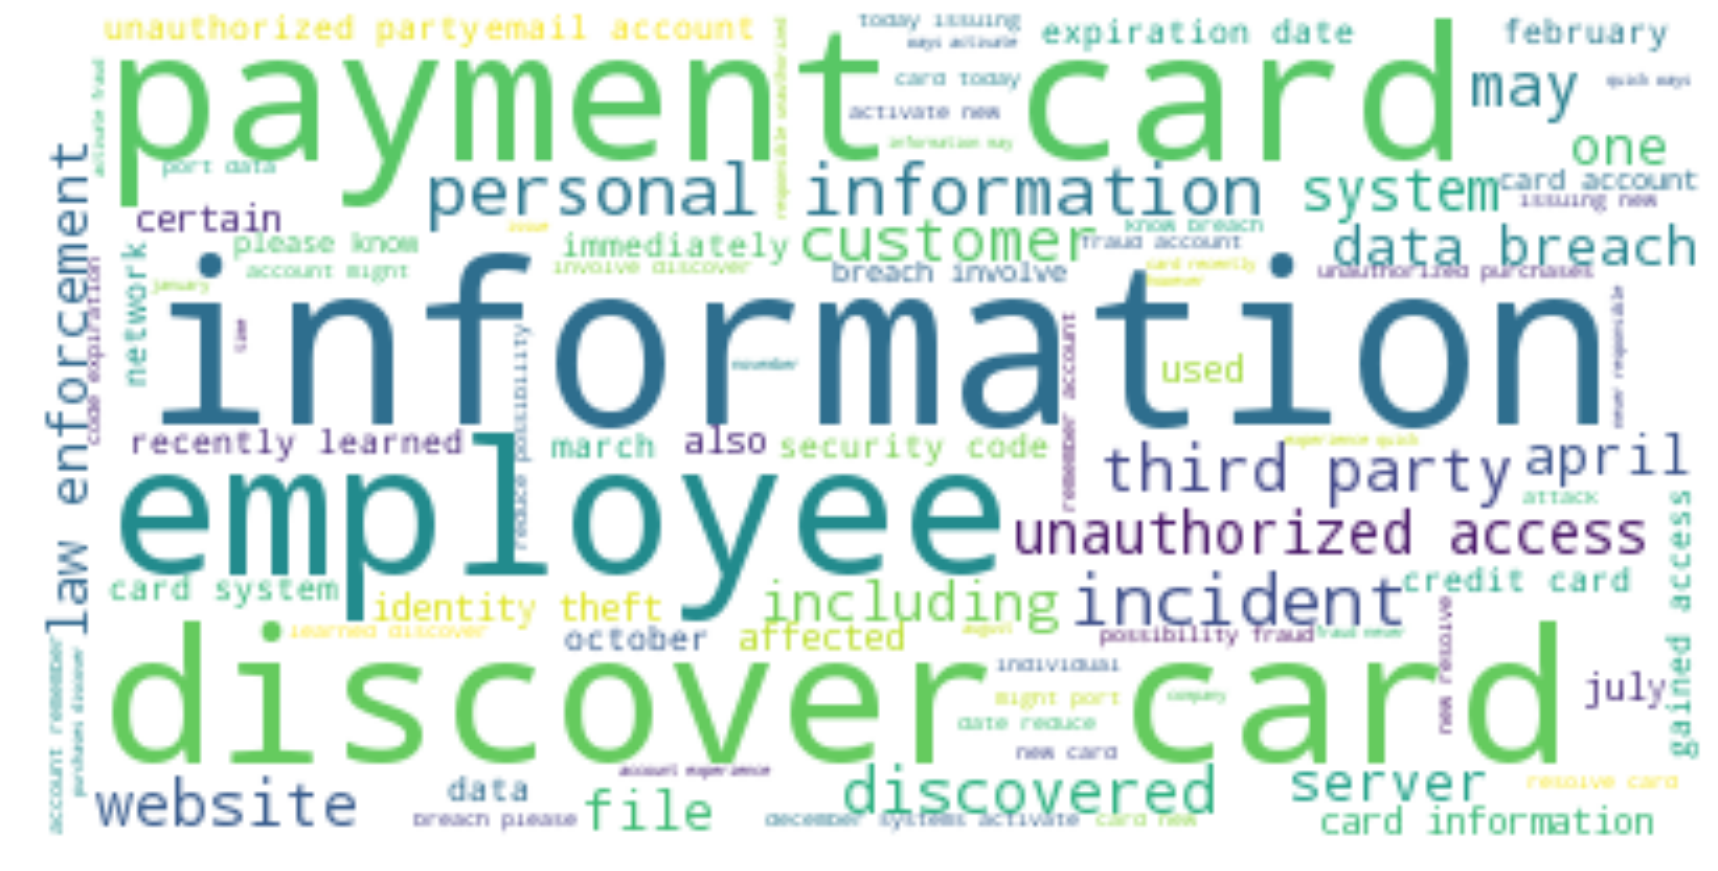

In [63]:
plt.figure(figsize=(30, 30))
plt.imshow(wc, interpolation = 'bilinear', cmap = 'summer')
plt.axis("off")
plt.savefig('What Happened.png')
plt.show()

What Information Was Involved?

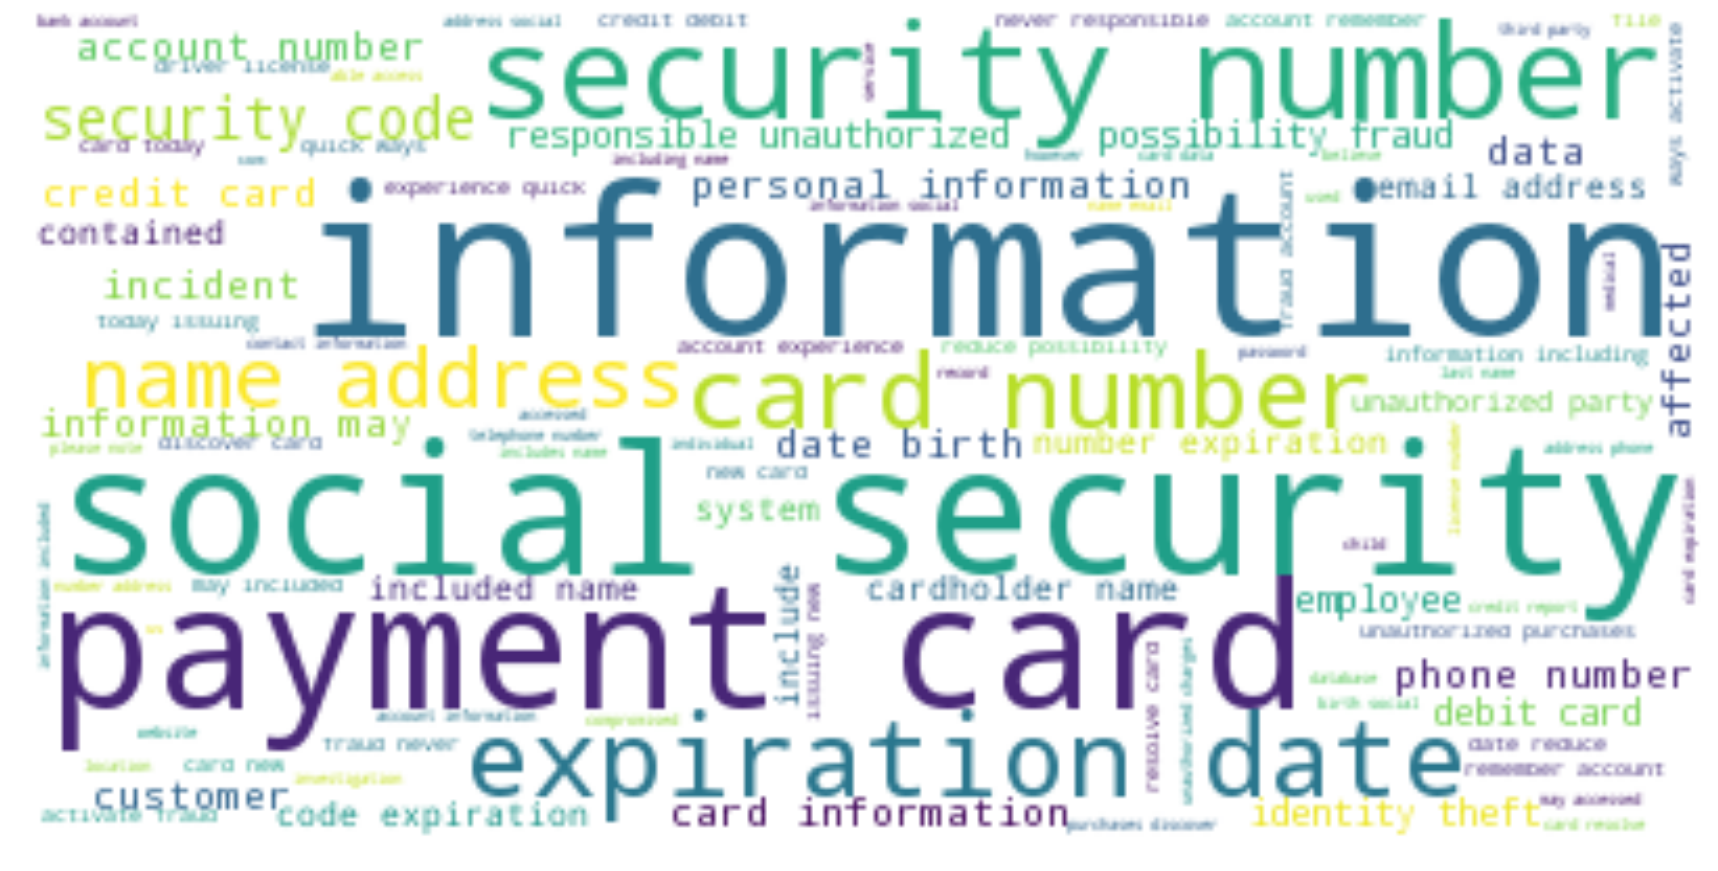

In [44]:
plt.figure(figsize=(30, 30))
plt.imshow(wc, interpolation = 'bilinear', cmap = 'Set1')
plt.axis("off")
plt.savefig('What Information Was Involved.png')
plt.show()

What Are We Doing?

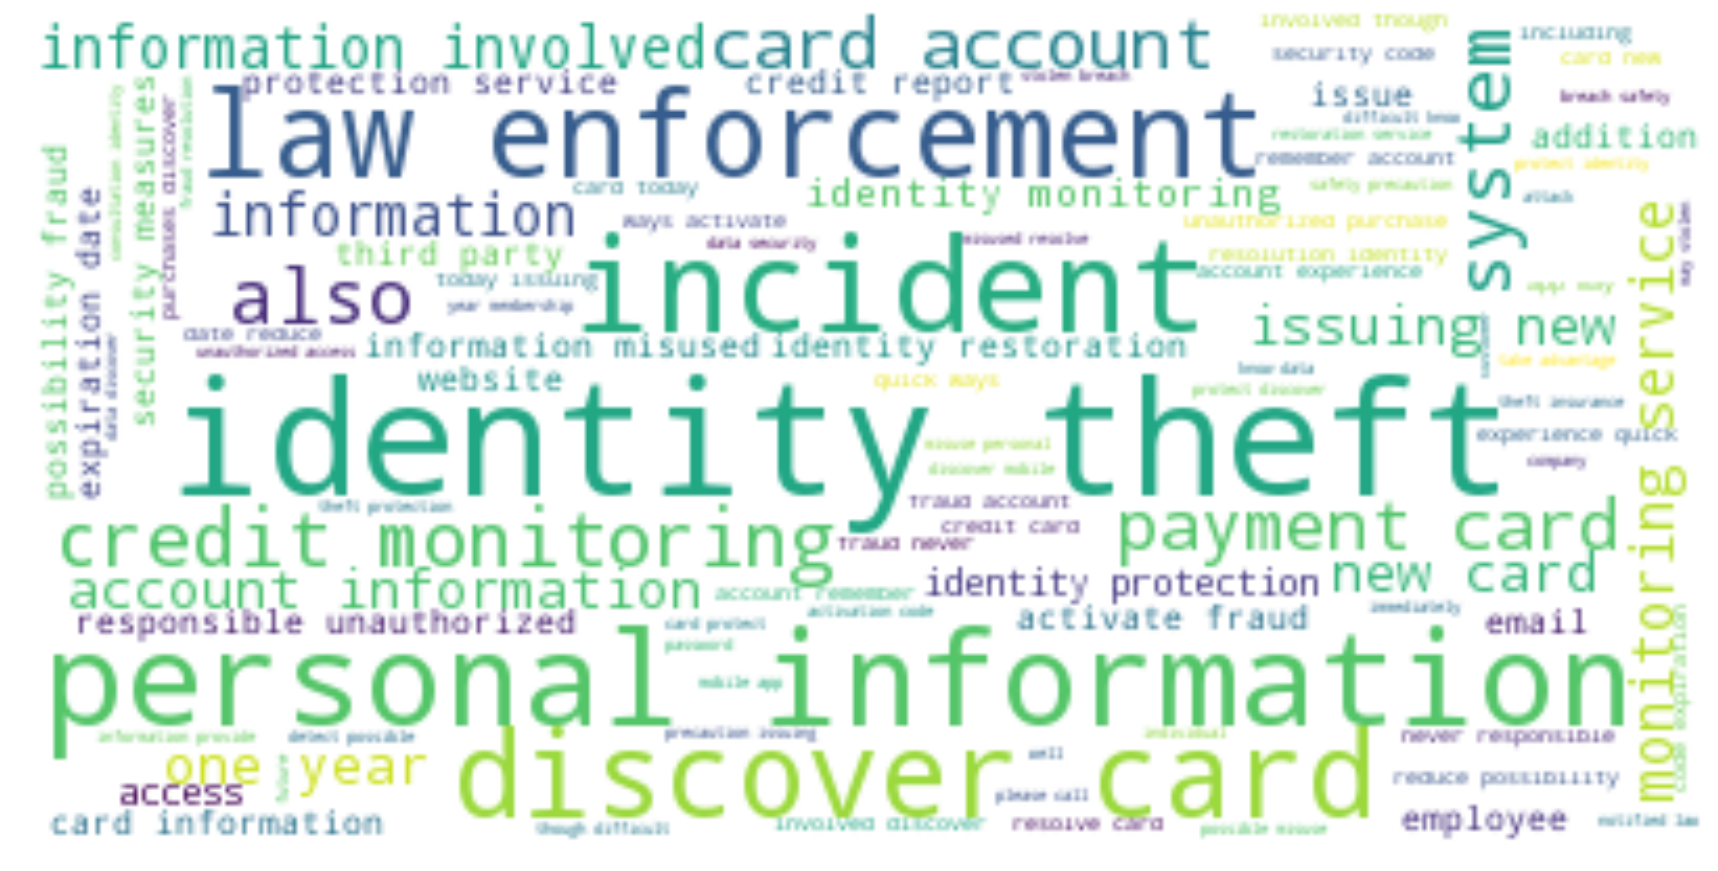

In [53]:
plt.figure(figsize=(30, 30))
plt.imshow(wc, interpolation = 'bilinear', cmap = 'Set2')
plt.axis("off")
plt.savefig('What Are We Doing.png')
plt.show()

What You Can Do?

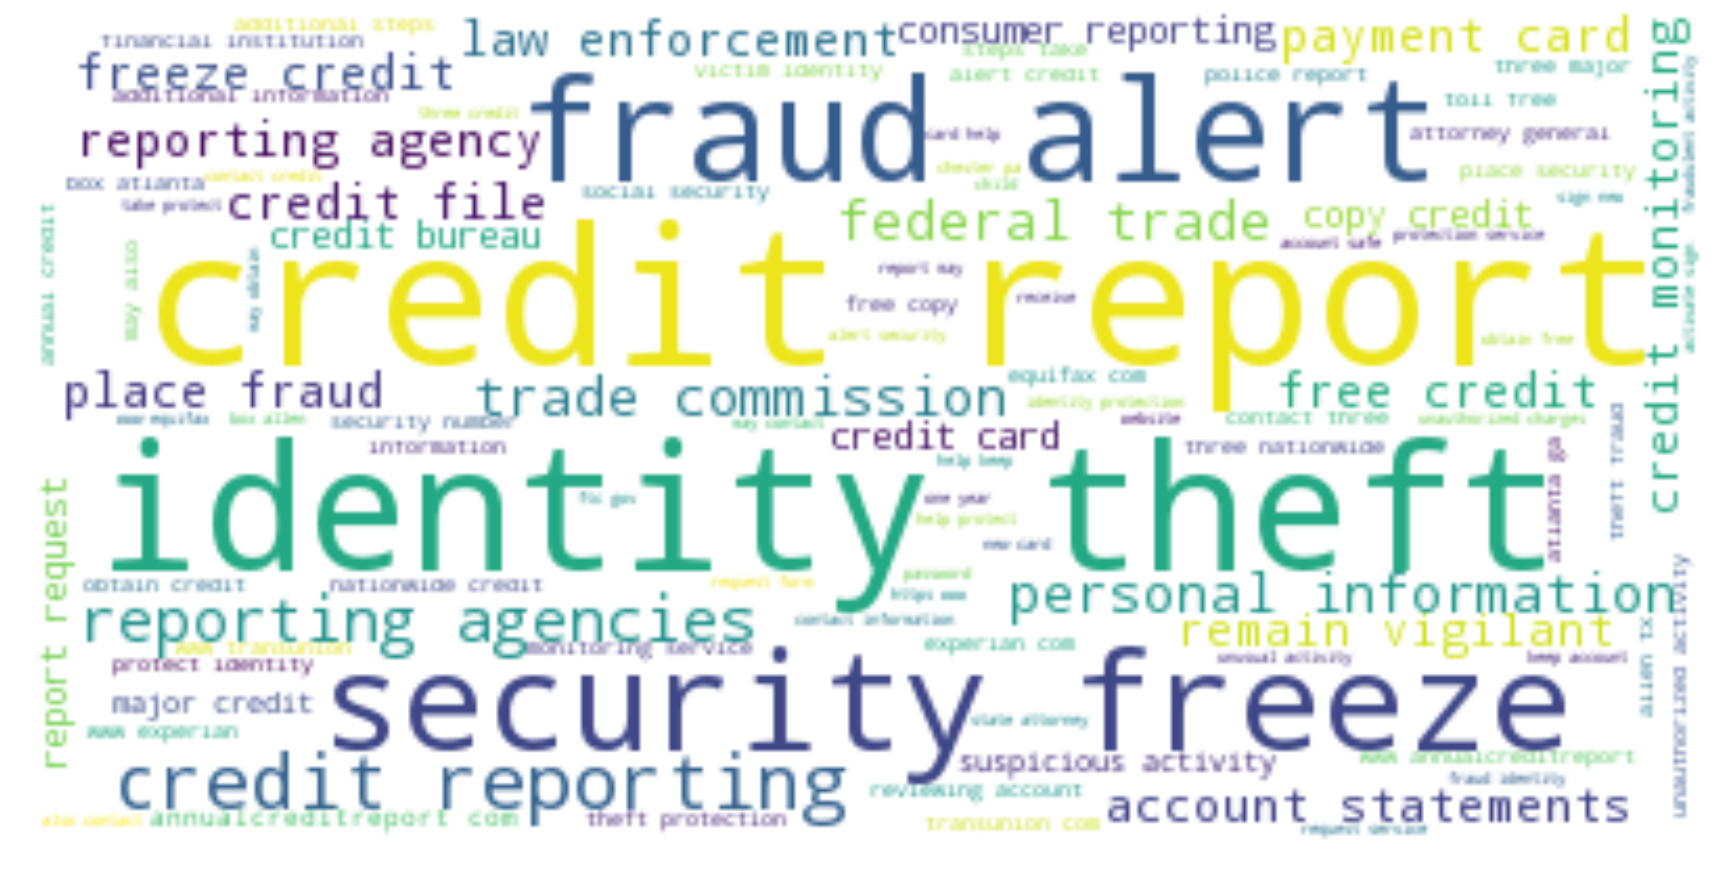

In [72]:
plt.figure(figsize=(30, 30))
plt.imshow(wc, interpolation = 'bilinear', cmap = 'cool')
plt.axis("off")
plt.savefig('What You Can Do.png')
plt.show()

Other Important Information

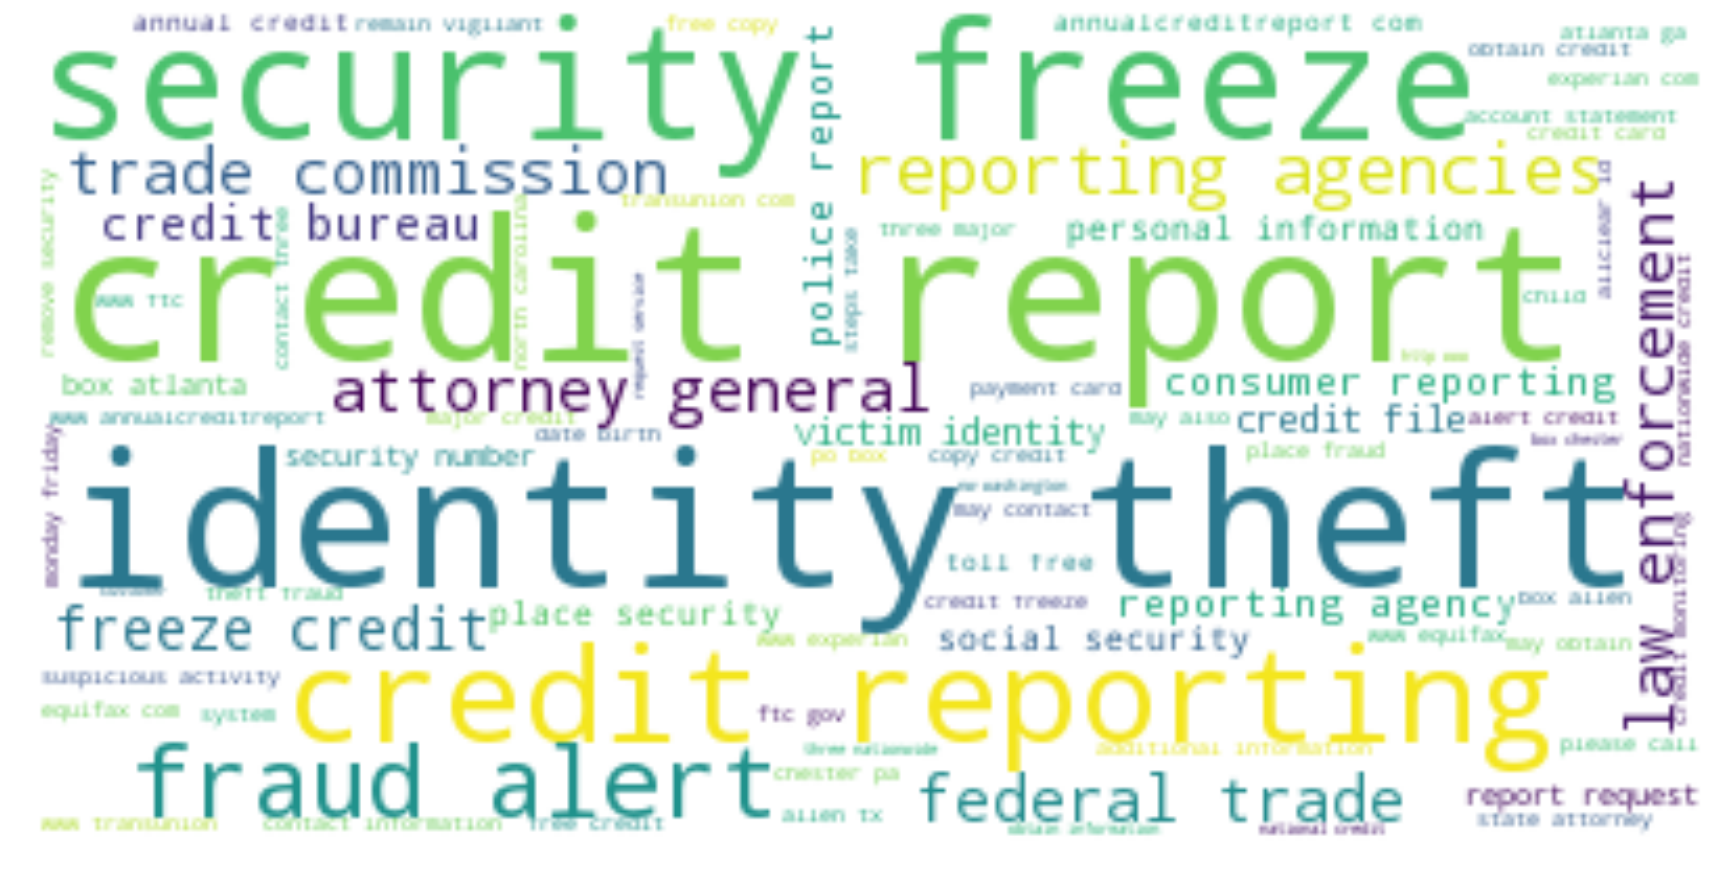

In [81]:
plt.figure(figsize=(30, 30))
plt.imshow(wc, interpolation = 'bilinear', cmap = 'cool')
plt.axis("off")
plt.savefig('Other Important Information.png')
plt.show()

For More Information

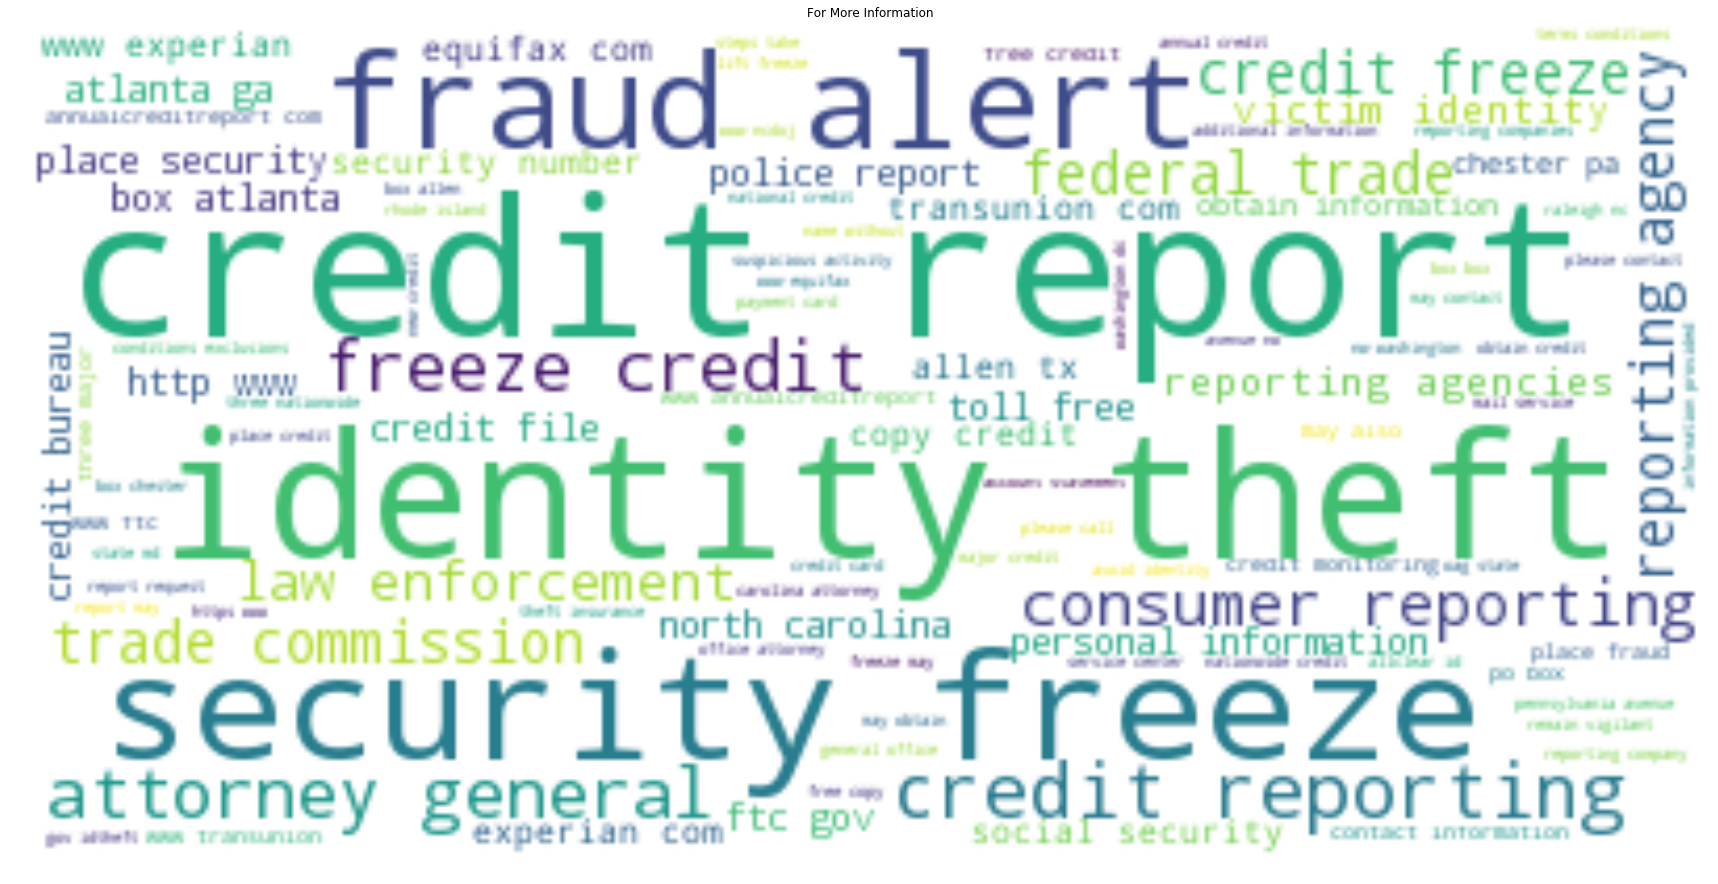

In [91]:
plt.figure(figsize=(30, 30))
plt.imshow(wc, interpolation = 'bilinear', cmap = 'spring')
plt.axis("off")
plt.title('For More Information')
plt.savefig('For More Information.png')
plt.show()